In [2]:
pip install tensorflow keras scikit-learn matplotlib pandas pillow opencv-python


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1856868093.py, line 1)

In [2]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

In [3]:
import pathlib
import seaborn as sns 
import random 


In [12]:
pip install split-folders

Defaulting to user installation because normal site-packages is not writeable
  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
import splitfolders

In [16]:

splitfolders.ratio(
    input=r"D:\Road Signs classification dataset\Dataset",  # raw string for Windows path
    output="output",                                        # output folder
    seed=1337,
    ratio=(.75, .2, .05),                                   # train, val, test
    group_prefix=None,
    move=False
)

Copying files: 75 files [00:00, 546.51 files/s]


In [18]:
import pathlib

data_dir = pathlib.Path('output/')
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'


In [19]:
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['test' 'train' 'val']


In [20]:
for dirpath,dirnames, filenames in os.walk('output'):
    print(f"{len(dirnames)} folder and {len(filenames)} images in {dirpath}")

3 folder and 0 images in output
3 folder and 0 images in output\test
0 folder and 2 images in output\test\5_miles_Speedlimit
0 folder and 2 images in output\test\No_entry
0 folder and 2 images in output\test\Speedlimit_15
3 folder and 0 images in output\train
0 folder and 18 images in output\train\5_miles_Speedlimit
0 folder and 18 images in output\train\No_entry
0 folder and 18 images in output\train\Speedlimit_15
3 folder and 0 images in output\val
0 folder and 5 images in output\val\5_miles_Speedlimit
0 folder and 5 images in output\val\No_entry
0 folder and 5 images in output\val\Speedlimit_15


In [21]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image Shape : {img.shape}")
    plt.show()

Image Shape : (128, 150, 3)


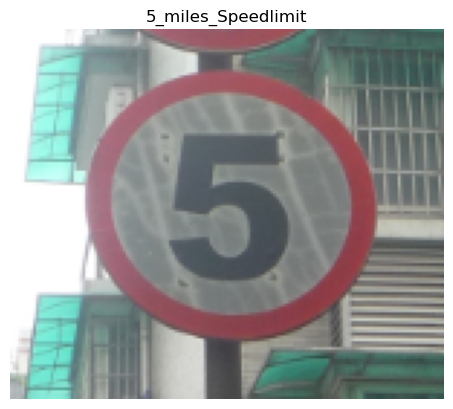

In [24]:
for i in range(1, 2):
    img_n = view_random_image(target_dir='output/train/', target_class='5_miles_Speedlimit')


Image Shape : (79, 77, 3)


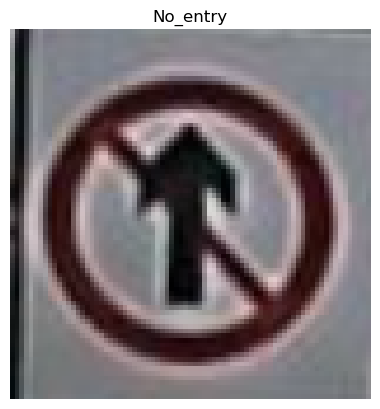

In [25]:
for i in range(1, 2):
    img_n = view_random_image(target_dir='output/train/', target_class='No_entry')

Image Shape : (119, 118, 3)


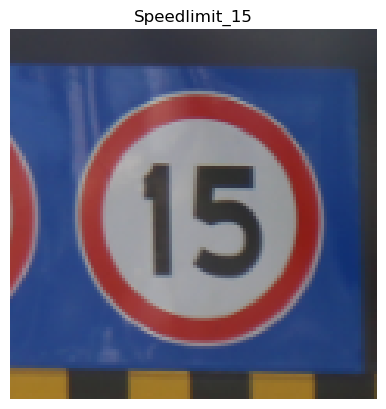

In [26]:
for i in range(1, 2):
    img_n = view_random_image(target_dir='output/train/', target_class='Speedlimit_15')

In [28]:
#set the global random seed
tf.random.set_seed(46)

#preprocess data
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [32]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(160, 160),
    class_mode='categorical',
    shuffle=True,
    seed=32
)

valid_data = valid_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    target_size=(160, 160),
    class_mode='categorical',
    shuffle=False,
    seed=32
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(160, 160),
    class_mode='categorical',
    shuffle=False,
    seed=32
)

Found 54 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [33]:
train_data.class_indices

{'5_miles_Speedlimit': 0, 'No_entry': 1, 'Speedlimit_15': 2}

In [34]:
train_y=train_data.classes
val_y=valid_data.classes 
test_y=test_data.classes

In [35]:
print("train_y.shape:", train_y.shape)
print("val_y.shape", val_y.shape)
print("test_y.shape", test_y.shape)

train_y.shape: (54,)
val_y.shape (15,)
test_y.shape (6,)


In [36]:
base_model = tf.keras.applications.DenseNet121(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [38]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.models import Model

In [39]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(160, 160, 3), weights='imagenet')
base_model.trainable = False 

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

Model architecture

In [ ]:
inputs = Input(shape=(160, 160, 3))
x = base_model(inputs, training=False)
x = Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(3, activation='softmax')(x)  # final layer with 3 output classes

model = Model(inputs, outputs)

In [40]:
inputs = Input(shape=(160, 160, 3))
x = base_model(inputs, training=False)
x = Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(3, activation='softmax')(x) 

In [44]:
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 1280)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [49]:
from tensorflow.keras.utils import plot_model


In [59]:
plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [60]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [62]:
history = model.fit(train_data, epochs=75, validation_data =valid_data)

Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 1.0000 - loss: 0.0308 - val_accuracy: 0.9333 - val_loss: 0.0717
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 0.0337
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 492ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step - accuracy: 0.9877 - loss: 0.0258 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.9772 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss:

In [67]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    # Plot Loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title("Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title("Accuracy Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


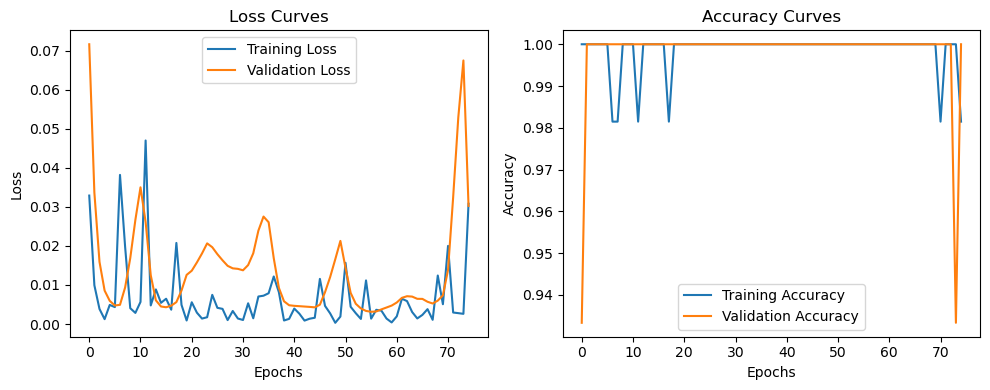

In [68]:
plot_loss_curves(history)

In [69]:
from sklearn.metrics import classification_report

# Get predicted class indices
val_pred_probs = model.predict(valid_data)
val_pred = val_pred_probs.argmax(axis=1)

# Get true class labels
val_y = valid_data.classes

# Get class labels (optional, for better report)
class_names = list(valid_data.class_indices.keys())

# Print classification report
print(classification_report(val_y, val_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
                    precision    recall  f1-score   support

5_miles_Speedlimit       1.00      1.00      1.00         5
          No_entry       1.00      1.00      1.00         5
     Speedlimit_15       1.00      1.00      1.00         5

          accuracy                           1.00        15
         macro avg       1.00      1.00      1.00        15
      weighted avg       1.00      1.00      1.00        15



In [ ]:
val_pred = model.predict(valid_data)
val_pred = val_pred.argmax(axis=1)
print(classification_report(val_pred, val_y))

In [70]:
model.save('my_model.keras')